# ArHgランプによるCCS200の校正式の算出

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [2]:
def linearfunc(x, a, b):
    return a*x + b

def difffunc(x,a):
    return x + a

In [3]:
data = pd.read_csv('../data/ccs200/arhg1ms.txt', sep=',', header=None)

In [4]:
peaks , _ = find_peaks(data[1], height=0.008, prominence=0.009, distance=20)

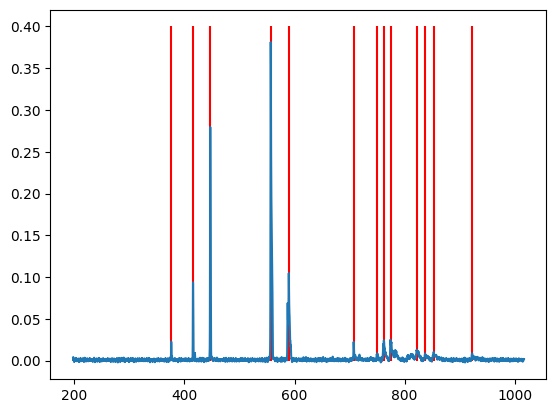

In [5]:
plt.vlines(data[0][peaks], 0, 0.4, color='r')
plt.plot(data[0], data[1])
plt.show()

In [6]:
for peak in peaks:
    print(data[0][peak], data[1][peak])

375.9247742 0.02267088741
415.4966431 0.09356710315
446.8983459 0.2795237303
556.7612915 0.3813187778
589.5819092 0.1046383455
707.4541016 0.02230855636
750.2277832 0.008479566313
762.3045044 0.0242409911
774.4044189 0.0249857828
821.8583984 0.01260612067
837.1247559 0.008399047889
852.8963623 0.01047238987
922.7554932 0.008479566313


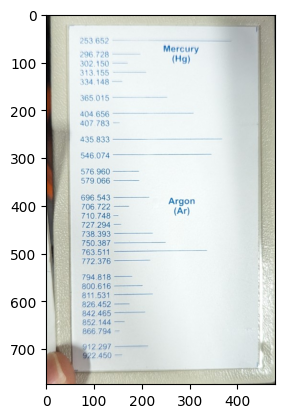

In [7]:
plt.imshow(Image.open('../docs/arhg.jpg'))

In [8]:
true_data = [365.015, 404.656, 435.833, 546.074, 579.066, 696.543, 738.393, 750.387, 763.511, 811.531, 826.452, 842.465, 912.297] 

In [9]:
threshold = 600
arhglamp_idx = [x for x in peaks if data[0][x] > threshold]
true_data = [x for x in true_data if x > threshold]
print(arhglamp_idx)
print(data[0][arhglamp_idx])
print(true_data)

[np.int64(2335), np.int64(2520), np.int64(2572), np.int64(2624), np.int64(2827), np.int64(2892), np.int64(2959), np.int64(3254)]
2335    707.454102
2520    750.227783
2572    762.304504
2624    774.404419
2827    821.858398
2892    837.124756
2959    852.896362
3254    922.755493
Name: 0, dtype: float64
[696.543, 738.393, 750.387, 763.511, 811.531, 826.452, 842.465, 912.297]


y=1.0056994302119182x + -15.511075234967695


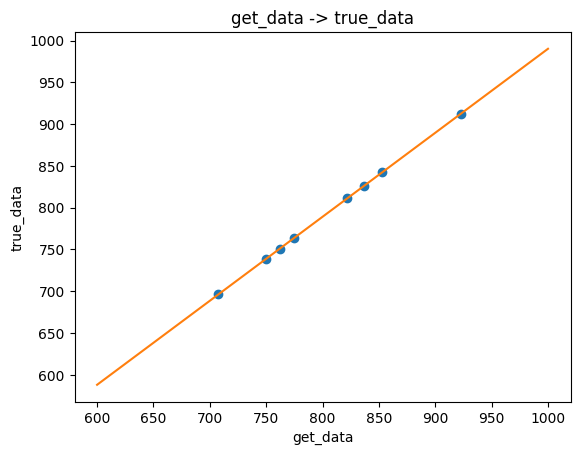

In [10]:
#get_data -> true_data
keisuu, _ = curve_fit(linearfunc, data[0][arhglamp_idx], true_data)
print(f"y={keisuu[0]}x + {keisuu[1]}")
plt.plot(data[0][arhglamp_idx], true_data, 'o')
xlist = np.linspace(600, 1000, 100)
plt.plot(xlist, linearfunc(xlist, keisuu[0], keisuu[1]))
plt.title('get_data -> true_data')
plt.xlabel('get_data')
plt.ylabel('true_data')
plt.show()

y=x + -10.930852157344008


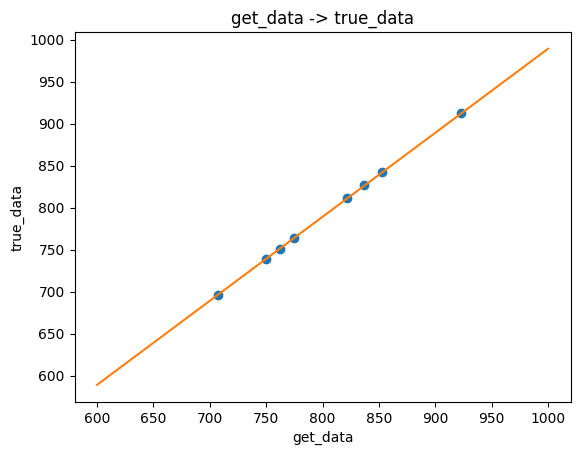

In [11]:
keisuu, _ = curve_fit(difffunc, data[0][arhglamp_idx], true_data)
print(f"y=x + {keisuu[0]}")
plt.plot(data[0][arhglamp_idx], true_data, 'o')
xlist = np.linspace(600, 1000, 100)
plt.plot(xlist, difffunc(xlist, keisuu[0]))
plt.title('get_data -> true_data')
plt.xlabel('get_data')
plt.ylabel('true_data')
plt.show()

y=0.2356080367414003x + 145.27594103922473


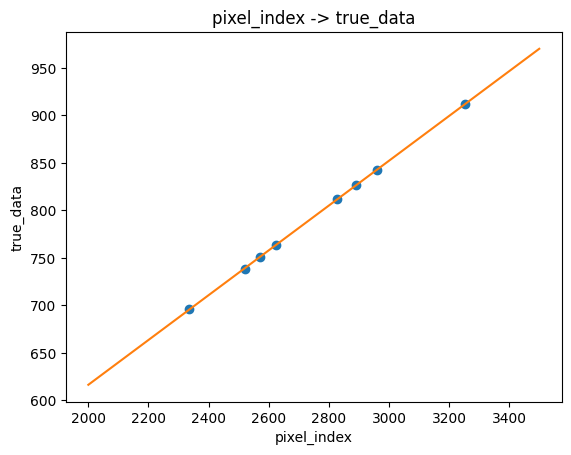

In [12]:
#pixel_index -> true_data
keisuu, _ = curve_fit(linearfunc, arhglamp_idx, true_data)
print(f"y={keisuu[0]}x + {keisuu[1]}")
plt.plot(arhglamp_idx, true_data, 'o')
xlist = np.linspace(2000, 3500, 100)
plt.plot(xlist, linearfunc(xlist, keisuu[0], keisuu[1]))
plt.title('pixel_index -> true_data')
plt.xlabel('pixel_index')
plt.ylabel('true_data')
plt.show()

# ArHgランプの校正同じファイバ

In [13]:
data = pd.read_csv('../data/ccs200/arhg10000ms.txt', sep=';', header=None)

In [14]:
peaks , _ = find_peaks(data[1], height=0.1, prominence=0.09, distance=20)

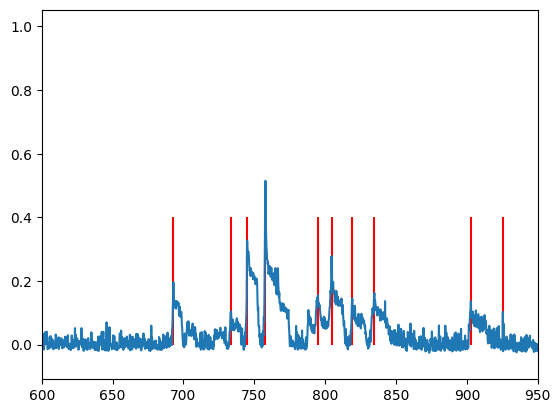

In [15]:
plt.vlines(data[0][peaks], 0, 0.4, color='r')
plt.plot(data[0], data[1])
plt.xlim(600, 950)
plt.show()

In [16]:
for peak in peaks:
    print(data[0][peak], data[1][peak])

409.53302 0.7530813217
440.8983765 1.0
552.6593018 1.0
579.6040039 1.0
692.9188232 0.1957895756
733.5155029 0.1042916924
744.8668823 0.3270848989
757.8654785 0.5148078203
794.918396 0.1552681774
804.5074463 0.2780035138
819.0343628 0.1447492093
834.7681885 0.1615923196
902.8060303 0.1359124482
925.3890381 0.1023326963


In [17]:
true_data = [365.015, 404.656, 435.833, 546.074, 579.066, 696.543, 738.393, 750.387, 763.511, 800.616, 811.531, 826.452, 842.465, 912.297] 

In [18]:
thresholdmin = 650
thresholdmax = 915
arhglamp_idx = [x for x in peaks if data[0][x] > thresholdmin and data[0][x] < thresholdmax]
true_data = [x for x in true_data if x > thresholdmin and x < thresholdmax]
print(arhglamp_idx)
print(data[0][arhglamp_idx])
print(true_data)

[np.int64(2271), np.int64(2447), np.int64(2496), np.int64(2552), np.int64(2711), np.int64(2752), np.int64(2814), np.int64(2881), np.int64(3169)]
2271    692.918823
2447    733.515503
2496    744.866882
2552    757.865478
2711    794.918396
2752    804.507446
2814    819.034363
2881    834.768188
3169    902.806030
Name: 0, dtype: float64
[696.543, 738.393, 750.387, 763.511, 800.616, 811.531, 826.452, 842.465, 912.297]


y=1.027356467861465x + -15.203576364522963


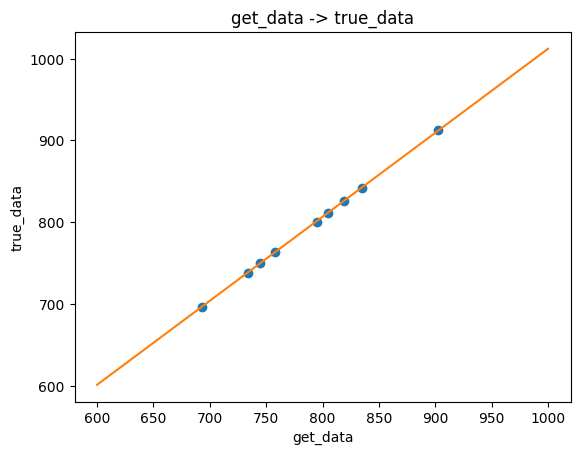

In [19]:
#get_data -> true_data
keisuu, _ = curve_fit(linearfunc, data[0][arhglamp_idx], true_data)
print(f"y={keisuu[0]}x + {keisuu[1]}")
plt.plot(data[0][arhglamp_idx], true_data, 'o')
xlist = np.linspace(600, 1000, 100)
plt.plot(xlist, linearfunc(xlist, keisuu[0], keisuu[1]))
plt.title('get_data -> true_data')
plt.xlabel('get_data')
plt.ylabel('true_data')
plt.show()

y=x + 6.332654355555544


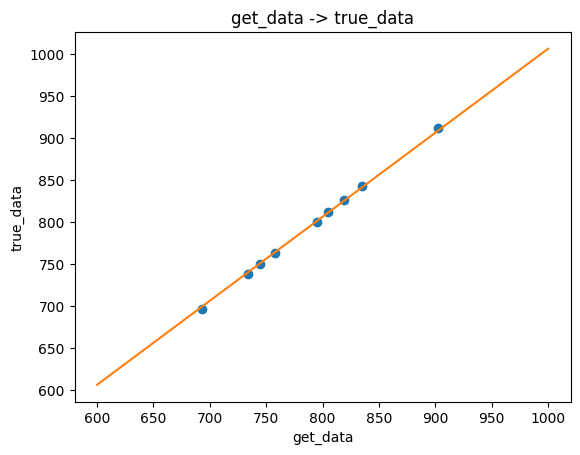

In [20]:
keisuu, _ = curve_fit(difffunc, data[0][arhglamp_idx], true_data)
print(f"y=x + {keisuu[0]}")
plt.plot(data[0][arhglamp_idx], true_data, 'o')
xlist = np.linspace(600, 1000, 100)
plt.plot(xlist, difffunc(xlist, keisuu[0]))
plt.title('get_data -> true_data')
plt.xlabel('get_data')
plt.ylabel('true_data')
plt.show()